In [1]:
from pathlib import Path
import sys

import geopandas as gpd
import matplotlib.pyplot as plt

sys.path.append("..")

from src.models.data import GeowikiCropHarvestDataset

### Geowiki Nigeria

In [2]:
countries_subset = ['Nigeria']
geowiki_nigeria = GeowikiCropHarvestDataset(
        root=Path('../data') / "cropharvest",
        countries_subset=countries_subset
    )

Found normalizing dict geowiki_normalizing_dict_Nigeria.h5
Loading normalizing dict geowiki_normalizing_dict_Nigeria.h5


<AxesSubplot:>

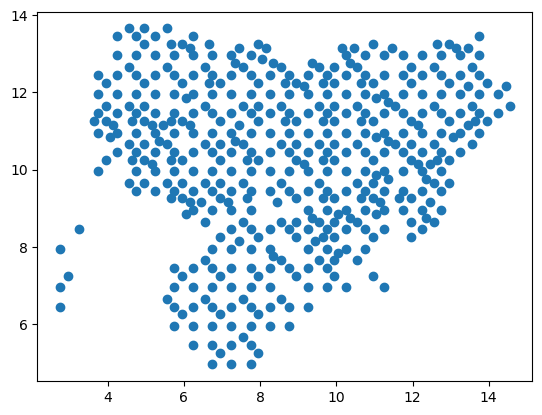

In [3]:
geowiki_nigeria.labels.plot()

### Geowiki Neighbours

In [4]:
countries_subset = ['Ghana', 'Togo', 'Nigeria', 'Cameroon', 'Benin']
geowiki_neighbours = GeowikiCropHarvestDataset(
        root=Path('../data') / "cropharvest",
        countries_subset=countries_subset
    )

Found normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5
Loading normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5


<AxesSubplot:>

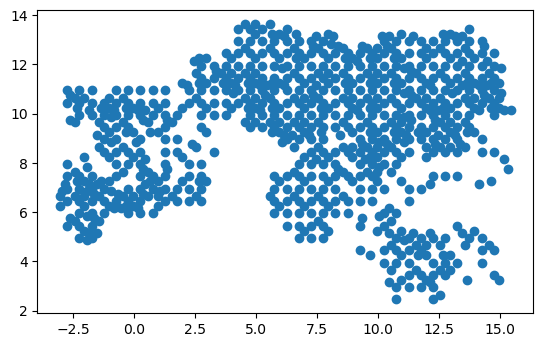

In [5]:
geowiki_neighbours.labels.plot()

### Geowiki World

In [6]:
countries_subset = None
geowiki_world = GeowikiCropHarvestDataset(
        root=Path('../data') / "cropharvest",
        countries_subset=countries_subset
    )

Found normalizing dict geowiki_normalizing_dict.h5
Loading normalizing dict geowiki_normalizing_dict.h5


<AxesSubplot:>

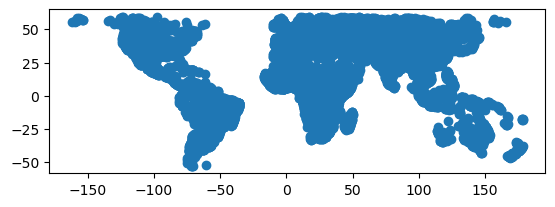

In [7]:
geowiki_world.labels.plot()

In [8]:
geowiki_world.labels

,harvest_date,planting_date,label,classification_label,index,is_crop,lat,lon,dataset,collection_date,export_end_date,externally_contributed_dataset,is_test,geometry,country,path
0,None,None,None,None,0,0,-16.547619,46.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (46.25000 -16.54762),Madagascar,../data/cropharvest/features/arrays/0_geowiki-...
1,None,None,None,None,1,1,-18.547619,48.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (48.25000 -18.54762),Madagascar,../data/cropharvest/features/arrays/1_geowiki-...
2,None,None,None,None,2,0,-21.547619,44.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (44.25000 -21.54762),Madagascar,../data/cropharvest/features/arrays/2_geowiki-...
3,None,None,None,None,3,1,-17.547619,45.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (45.25000 -17.54762),Madagascar,../data/cropharvest/features/arrays/3_geowiki-...
4,None,None,None,None,4,0,-21.547619,46.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (46.25000 -21.54762),Madagascar,../data/cropharvest/features/arrays/4_geowiki-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24756,None,None,None,None,35849,1,16.651786,103.550595,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (103.55060 16.65179),Thailand,../data/cropharvest/features/arrays/35849_geow...
24757,None,None,None,None,35850,1,22.651786,84.550595,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (84.55060 22.65179),India,../data/cropharvest/features/arrays/35850_geow...
24758,None,None,None,None,35851,1,10.651786,76.550595,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (76.55060 10.65179),India,../data/cropharvest/features/arrays/35851_geow...
24759,None,None,None,None,35860,0,-0.348214,36.550595,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,False,POINT (36.55060 -0.34821),Kenya,../data/cropharvest/features/arrays/35860_geow...


## Plot all together

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as patches

def create_multi_scale_map(world_points, regional_points, nigeria_points):
    # Create figure with custom gridspec
    fig = plt.figure(figsize=(20, 15))
    #gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 1], hspace=0.1)
    gs = fig.add_gridspec(2, 2, height_ratios=[1.8, 1], hspace=0.1)
    
    # Create three subplots with specific layout
    ax_world = fig.add_subplot(gs[0, :])    # Top row, full width
    ax_nigeria = fig.add_subplot(gs[1, 0])  # Bottom left
    ax_regional = fig.add_subplot(gs[1, 1])  # Bottom right
    
    # Get world base map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    # Set titles for each subplot with reduced padding and larger font
    ax_world.set_title('Geowiki World', pad=10, fontsize=16)
    ax_regional.set_title('Geowiki Neighbours', pad=10, fontsize=16)
    ax_nigeria.set_title('Geowiki Nigeria', pad=10, fontsize=16)
    
    # Create empty lists to collect legend handles and labels
    legend_elements = []
    
    # Plot world map
    world.plot(ax=ax_world, color='lightgray', edgecolor='white')
    world_points.plot(ax=ax_world, color='red', markersize=2, alpha=0.5)
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                    markerfacecolor='red', markersize=10, alpha=0.7,
                                    label=f'Geowiki World ({len(world_points)} points)'))
    ax_world.set_xlim([-180, 180])
    ax_world.set_ylim([-90, 90])
    
    # Plot regional map (Nigeria + neighbors)
    world.plot(ax=ax_regional, color='lightgray', edgecolor='white')
    regional_points.plot(ax=ax_regional, color='blue', markersize=4, alpha=0.7)
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                    markerfacecolor='blue', markersize=10, alpha=0.7,
                                    label=f'Geowiki Neighbours ({len(regional_points)} points)'))
    
    # Set bounds for regional map with some padding
    regional_bounds = regional_points.total_bounds
    padding = 2  # degrees of padding
    ax_regional.set_xlim([regional_bounds[0] - padding, regional_bounds[2] + padding])
    ax_regional.set_ylim([regional_bounds[1] - padding, regional_bounds[3] + padding])
    
    # Plot Nigeria map
    world.plot(ax=ax_nigeria, color='lightgray', edgecolor='white')
    nigeria_points.plot(ax=ax_nigeria, color='green', markersize=6)
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                    markerfacecolor='green', markersize=10,
                                    label=f'Geowiki Nigeria ({len(nigeria_points)} points)'))
    
    # Set bounds for Nigeria map with some padding
    nigeria_bounds = nigeria_points.total_bounds
    padding = 1  # less padding for the more detailed view
    ax_nigeria.set_xlim([nigeria_bounds[0] - padding, nigeria_bounds[2] + padding])
    ax_nigeria.set_ylim([nigeria_bounds[1] - padding, nigeria_bounds[3] + padding])
    
    # Add single legend to the figure - moved to the left
    fig.legend(handles=legend_elements, loc='center left',  bbox_to_anchor=(0.143, 0.52),
               frameon=True, fancybox=True, edgecolor='black', facecolor='white', fontsize=14)
    
    # Remove axes for world map only
    ax_world.axis('off')
    
    # Add coordinate axes to bottom plots with larger font sizes
    for ax in [ax_regional, ax_nigeria]:
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_xlabel('Longitude', fontsize=14)
        ax.set_ylabel('Latitude', fontsize=14)
        # Increase tick label sizes
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Add rectangles for the regions
    # Regional area in world map
    rect_regional = patches.Rectangle(
        (regional_bounds[0], regional_bounds[1]),
        regional_bounds[2] - regional_bounds[0],
        regional_bounds[3] - regional_bounds[1],
        facecolor='none',
        edgecolor='blue',
        linewidth=1,
        transform=ax_world.transData
    )
    ax_world.add_patch(rect_regional)
    
    # Nigeria area in regional map
    rect_nigeria_regional = patches.Rectangle(
        (nigeria_bounds[0], nigeria_bounds[1]),
        nigeria_bounds[2] - nigeria_bounds[0],
        nigeria_bounds[3] - nigeria_bounds[1],
        facecolor='none',
        edgecolor='green',
        linewidth=1,
        transform=ax_regional.transData
    )
    ax_regional.add_patch(rect_nigeria_regional)
    
    # Add connecting lines to corners
    def add_corner_connections(ax_from, ax_to, bounds_from, color, from_left=False):
        if from_left:
            # For Nigeria to Nigeria subplot connection
            source_points = [
                (bounds_from[0], bounds_from[3]),  # top left of rectangle
                (bounds_from[0], bounds_from[1])   # bottom left of rectangle
            ]
        else:
            # For regional connection
            source_points = [
                (bounds_from[0], bounds_from[1]),  # bottom left of rectangle
                (bounds_from[2], bounds_from[1])   # bottom right of rectangle
            ]

        # Draw connections
        for i, source in enumerate(source_points):
            if from_left:
                # Connect to right side of target subplot
                con = patches.ConnectionPatch(
                    xyA=source,
                    xyB=(1, 1 if i == 0 else 0),  # top or bottom right corner
                    coordsA='data',
                    coordsB='axes fraction',
                    axesA=ax_from,
                    axesB=ax_to,
                    color=color,
                    linewidth=1,
                    linestyle='--'
                )
            else:
                # Connect to top of target subplot
                con = patches.ConnectionPatch(
                    xyA=source,
                    xyB=(0 if i == 0 else 1, 1),  # top left or right corner
                    coordsA='data',
                    coordsB='axes fraction',
                    axesA=ax_from,
                    axesB=ax_to,
                    color=color,
                    linewidth=1,
                    linestyle='--'
                )
            ax_from.add_artist(con)
    
    # Add corner connections
    add_corner_connections(ax_world, ax_regional, regional_bounds, 'blue')
    add_corner_connections(ax_regional, ax_nigeria, nigeria_bounds, 'green', from_left=True)
    
    plt.tight_layout()
    # Adjust layout to make room for the legend on the left
    plt.subplots_adjust(left=0.1)

/mnt/Data/jgajardo/miniconda3/envs/nigeria-crop-mask-gpu3/lib/python3.7/site-packages/ipykernel_launcher.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


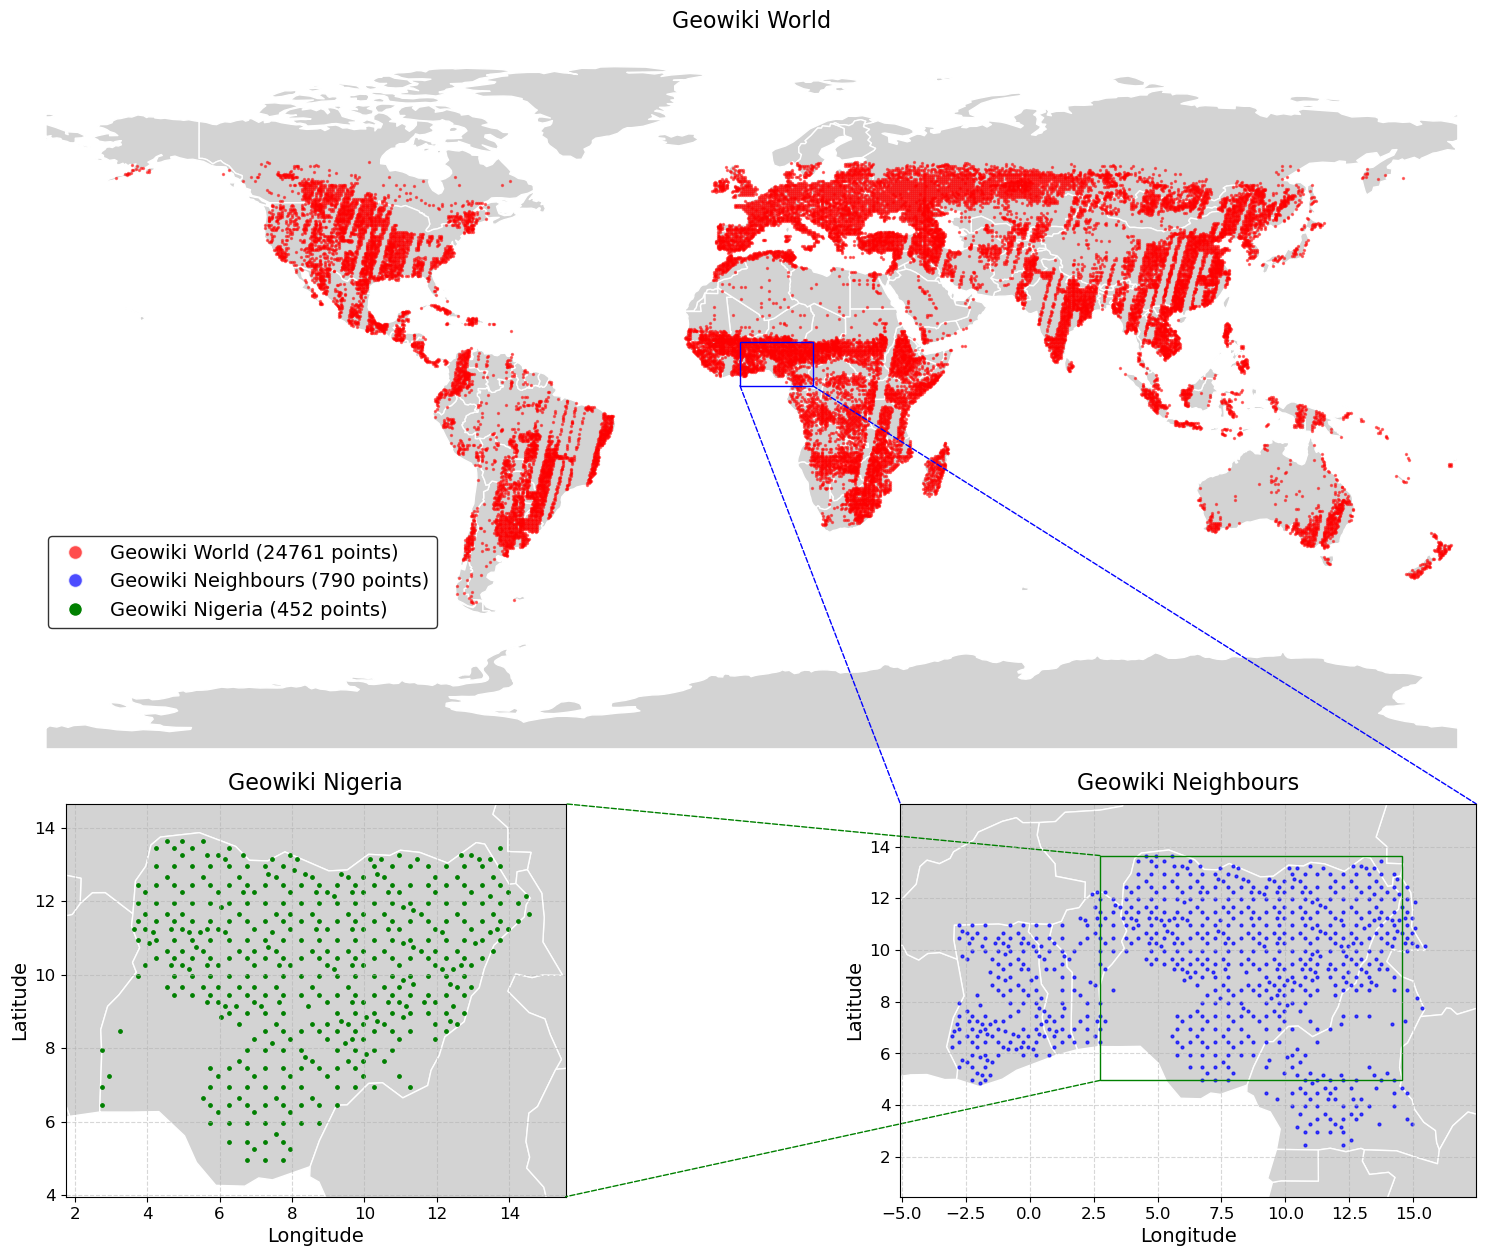

In [10]:
fig = create_multi_scale_map(geowiki_world.labels, geowiki_neighbours.labels, geowiki_nigeria.labels)

plt.savefig('../figures/geowiki_points_figure.png', dpi=300, bbox_inches='tight')
plt.savefig('../figures/geowiki_points_figure.pdf', bbox_inches='tight')

plt.show()